# <b>[파이썬 머신러닝 완벽 가이드]</b> <br>
# Chapter 08 텍스트 분석 <br>
- `텍스트 분류 (Text Classification, Text Categorization)`: 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법을 통칭함. 예를 들어 특정 신문 기사 내용이 연애/정치/사회/문화 중 어떤 카테고리에 속하는지 자동으로 분류하거나 스팸 메일 검출 같은 프로그램이 이에 속하며 지도학습을 적용함
- `감성 분석 (Sentiment Analysis)`: 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법을 통칭함. 소셜 미디어 감정 분석, 영화나 제품에 대한 긍정 또는 리뷰, 여론조사 의견 분석 등의 다양한 영역에서 활용되며 Text Analytics에서 가장 활발하게 사용되고 있는 분야임. 지도학습 방법 뿐만 아니라 비지도학습을 이용해 적용할 수 있음
- `텍스트 요약 (Summarization)`: 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법을 말하며 대표적으로 토픽 모델링(Topic Modeling)이 있음
- `텍스트 군집화 (Clustering)와 유사도 측정`: 비슷한 유형의 문서에 대해 군집화를 수행하는 기법을 말하며 텍스트 분류를 비지도학습으로 수행하는 방법의 일환으로 사용될 수 있음. 유사도 측정 역시 문서들간의 유사도를 측정해 비슷한 문서끼리 모을 수 있는 방법임

## 8.1 텍스트 분석 이해 <br>
- `피처 벡터화 (Feature Vectorization)` / `피처 추출 (Feature Extraction)`: 텍스트를 word 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하여 텍스트를 단어의 조합인 벡터값으로 표현하는 것임
- 텍스트를 피처 벡터화해서 변환하는 방법에는 'BOW (Bag of Words)'와 Word2Vec 방법이 있음
<br><br>

### 텍스트 분석 수행 프로세스
1. 텍스트 사전 준비작업 (텍스트 전처리): 텍스트를 피처로 만들기 전에 미리 클렌징. 대/소문자 변경. 특수문자 삭제 등의 클렌징 작업. 단어(Word) 등의 토큰화 작업. 의미 없는 단어(Stop word) 제거 작업. 어근 추출(Stemming/Lemmatization) 등의 텍스트 정규화 작업을 수행하는 것을 통칭함
2. 피처 벡터화/추출: 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당함. 대표적인 방법은 BOW와 Word2Vec이 있으며, BOW는 대표적으로 Count 기반과 TF-IDF 기반 벡터화가 있음
3. ML 모델 수립 및 학습/예측/평가: 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가를 수행함
<br>

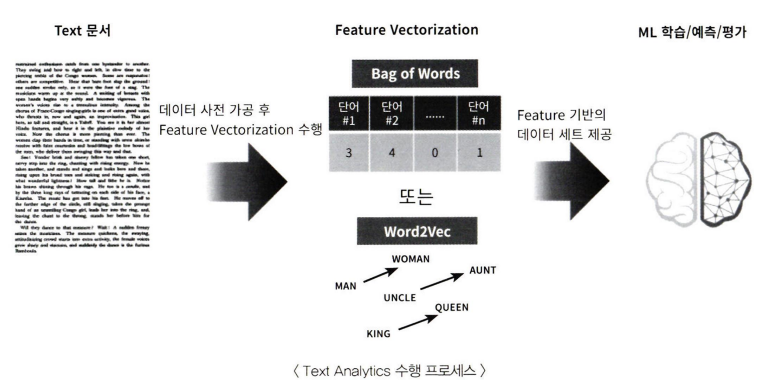
<br>

### 파이썬 기반의 NLP, 텍스트 분석 패키지
- `NTLK (Natural Language Toolkit for Python)`: 파이썬의 가장 대표적인 NLP 패키지. 방댇한 데이터 세트와 서브 모듈을 가지고 있으며 NLP의 거의 모든 영역을 커버하고 있으며 많은 NLP 패키지가 NLTK의 영향을 받아 작성되고 있음. 수행 속도 측면에서 아쉬운 부분이 있어서 실제 대량의 데이터 기반에서는 제대로 확룔되지 못하고 있음
- `Gensim`: 토픽 모델링 분야에서 가장 두각을 나타내는 패키지. 오래전부터 토픽 모델링을 쉽게 구현할 수 있는 기능을 제공해 왔으며, Word2Vec 구현 등의 다양한 신기능도 제공함. SpaCy와 함께 가장 많이 사용되는 NLP 패키지임
- `SpaCy`: 뛰어난 수행 성능으로 최근 가장 주목을 받는 NLP 패키지. 많은 NLP 애플리케이션에서 SpaCy를 사용하는 사례가 늘고 있음

## 8.2 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화<br>

### 클렌징
- 텍스트에서 분서겡 오히려 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업
- 예를 들어 HTML, XML 태그나 특정 기호 등을 사전에 제거함
<br><br>

### 텍스트 토큰화
- 토큰화의 유형은 문서에서 문장을 분리하는 문장 토큰화와 문장에서 단어를 토큰으로 분리하는 단어 토큰화로 나눌 수 있음
- NLTK는 이를 위해 다양한 API를 제공함
<br><br>

#### [문장 토큰화]
- 문장 토큰화(sentence tokenization)는 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적임
- 또한, 정규 표현식에 따른 문장 토큰화도 가능함
- NTLK에서 일반적으로 많이 쓰이는 `sent_tokenize()` 이용

In [2]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               you feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample) #sent_tokenize(): 각각의 문장으로 구성된 list 객체 반환

print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'you feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimhj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### [단어 토큰화]
- 단어 토큰화 (Word Tokenization)는 문장을 단어로 토큰화하는 것임
- 기본적으로 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어를 분리하지만, 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행할 수 있음
- 마침표나 개행문자와 같이 문장을 분리하는 구분자를 이용해 단어를 토큰화할 수 있으므로 Bag of Word와 같이 단어의 순서가 중요하지 않은 경우 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 충분함
- 일반적으로 문장 토큰화는 각 문장이 가지는 시맨틱적인 의미가 중요한 요소로 사용될 때 사용함
- NTLK에서 기본으로 제공하는 `word_tokenize()` 이용

In [3]:
from nltk import word_tokenize

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [4]:
#여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
    #문장별로 분리 토큰
    sentences = sent_tokenize(text)
    #분리된 문장별로 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['you', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


- 문장을 단어별로 하나씩 토큰화할 경우 문맥적인 의미는 무시될 수밖에 없음
- 이러한 문제를 조금이라도 해결해 보고자 도입된 것이 'n-gram'임
- n-gram은 연속된 n개의 단어를 하나씩 토큰화 단위로 분리해 내는 것임
- n개 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화를 수행함
- 예를 들어, "Agent Smith knocks the door"를 2-gram으로 만들면 (Agent, Smith), (Smith, knocks), (knocks, the), (the, door)와 같이 연속적으로 2개의 단어들을 순차적으로 이동하면서 단어들을 토큰화함
<br><br>

### 스톱 워드 제거 <br>
- 스톱 워드 (Stop word)는 분석에 큰 의미가 없는 단어를 지칭함 (is, the, a, will 등)
- 이 단어의 경우 문법적인 특성으로 인해 빈번하게 텍스트에 나타나므로, 이것들을 사전에 제거하지 않으면 그 빈번함으로 인해 오히려 중요한 단어로 인지될 수 있음
- 따라서 이 의미 없는 단어를 제거하는 것이 중요한 전처리임
- 언어별로 이러한 스톱 워드가 목록화되어 있음

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kimhj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [8]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

#위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words = []
    #개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence:
        #소문자로 모두 변환
        word = word.lower()
        #토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### Stemming과 Lemmatization <br>
- Stemming과 Lemmatization 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것임
- 두 기능 모두 원형 단어를 찾는다는 목적은 유사하지만, Lemmatizationdl Stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾음
- Stemming은 원형 ㄷ나어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있음
- 이에 반해 Lemmatization은 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아줌
- 따라서 Lemmatization이 Stemming보다 변환에 더 오랜 시간을 필요로 함
<br><br>
- NLTK는 Porter, Lancaster, Snowball Stemmer와 같은 Stemmer를 제공함
- Lemmatization을 위해서는 WordNetLemmatizer를 제공함

In [10]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('working'), stemmer.stem('works'))

work work work
amus amus amus
happy happiest
work work


In [11]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
#정확한 원형 단어 추출을 위해 단어의 품사 입력
print(lemma.lemmatize('amusing','v'), lemma.lemmatize('amuses','v'), lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'), lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'), lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kimhj\AppData\Roaming\nltk_data...


amuse amuse amuse
happy happy
fancy fancy


## 8.3 Bag or Words - BOW<br>
- Bag of Words 모델은 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델임
- 문서 내 모든 단어를 한꺼번에 봉투(Bag) 안에 넣은 뒤에 흔들어서 섞는다는 의미로 Bag of Words(BOW) 모델이라고 함
<br><br>

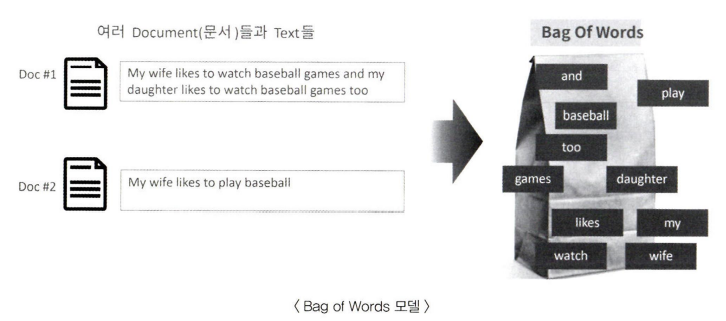
<br>
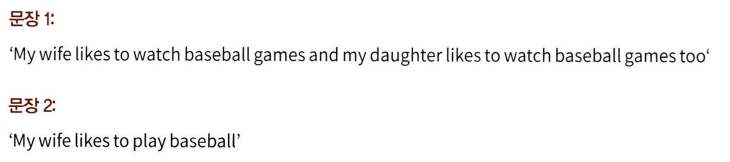
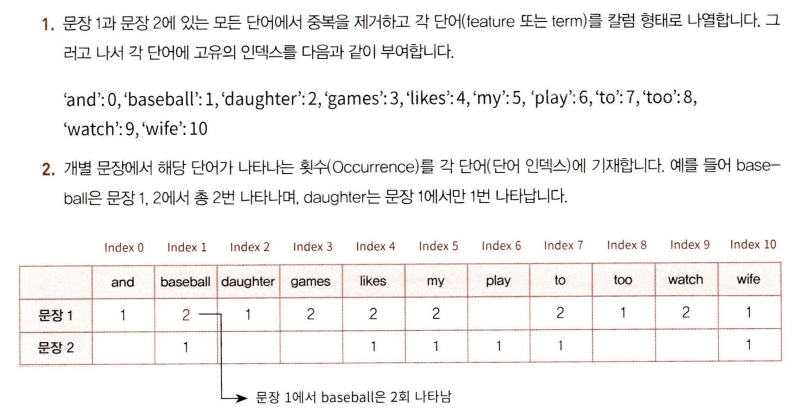
<br><br>
- BOW 모델의 장점은 쉽고 빠른 구축에 있음
- 단순히 단어의 발생 횟수에 기반하고 있지만, 예상보다 문서의 특징을 잘 나타낼 수 있는 모델이어서 전통적으로 여러 분야에서 활용도가 높음
- BOW의 대표적인 단점:
    - 문맥 의미(Semantic Context) 반영 부족: BOW는 단어의 순서를 고려하지 않기 대문에 문장 내에서 단어의 문맥적인 의미가 무시됨. 물론 이를 보완하기 위해 n_gram 기법을 활용할 수 있지만, 제한적인 부분에 그치므로 언어의 많은 부분을 차지하는 문맥적인 해석을 처리하지 못하는 단점이 있음
    - 희소 행렬 문제(희소성, 희소 행렬): BOW로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움. 많은 문서에서 단어를 추출하면 매우 많은 단어가 칼럼으로 만들어짐. 문서마다 서로 다른 단어로 구성되기에 단어가 문서마다 나타나지 않는 경우가 훨씬 더 많음. 즉, 매우 많은 문서에서 단어의 총 개수는 수만~수십만 개가 될 수 있는데, 하나의 문서에 있는 단어는 이 중 극히 일부분이므로 대부분의 데이터는 0 값으로 채워지게 됨. 이처럼 대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행렬을 희소 행렬(Sparse Matrix)이라고 함. 이와는 반대로 대부분의 값이 0이 아닌 의미 있는 값으로 채워져 있는 행렬을 밀집 행렬(Dense Matrix)이라고 함. 희소 행렬은 일반적으로 ML 알고리즘의 수행 시간과 예측 성능을 떨어뜨리기 때문에 희소 행렬을 위한 특별한 기법이 마련돼 있음

### BOW 피처 벡터화 <br>
- 머신러닝 알고리즘은 일반적으로 숫자형 피처를 데이터로 입력받아 동작하기 때문에 텍스트와 같은 데이터는 머신러닝 알고리즘에 바로 입력할 수가 없음
- 따라서 텍스트는 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환해야 하는데, 이러한 변환을 피처 벡터화라고 함
- 피처 벡터화는 각 문서의 텍스트를 단어로 추출해 피처로 할당하고, 각 단어의 발생 빈도와 같은 값을 이 피처에 값으로 부여해 각 문서를 이 단어 피처의 발생 빈도 값으로 구성된 벡터로 만드는 기법임
- 피처 벡터화는 기존 텍스트 데이터를 또 다른 형태의 피처의 조합으로 변경하기 때문에 넓은 범위의 피처 추출에 포함함
<br><br>
- BOW 모델에서 피처 벡터화를 수행한다는 것은 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것임
- 예를 들어 M개의 텍스트 문서가 있고, 이 문서에서 모든 단어를 추출해 나열했을 때 N개의 단어가 있다고 가정하면 문서의 피처 벡터화를 수행하면 M개의 문서는 각각 N개의 값이 할당된 피처의 벡터 세트가 되며 결과적으로 M x N개의 단어 피처로 이뤄진 행렬을 구성하게 됨
<br>

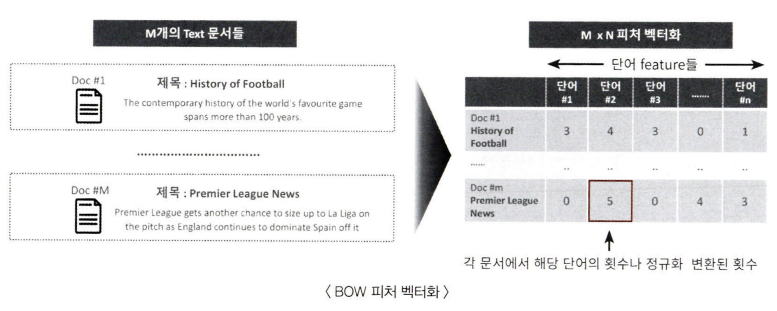

<br>

- 일반적으로 BOW의 피처 벡터화는 두 가지 방식이 있음
    - 카운트 기반의 벡터화: 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수 (Count)를 부여하는 경우로, 카운트 값이 높을수록 중요한 단어로 인식됨. 그러나 카운트만 부여할 경우 그 문서의 특징을 나타내기보다는 언어의 특성상 문장에서 자주 사용될 수밖에 없는 단어까지 높은 값을 부여하게 됨
    - TF-IDF (Term Frequency - Inverse Document Frequency) 기반의 벡터화: 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여함
<br>

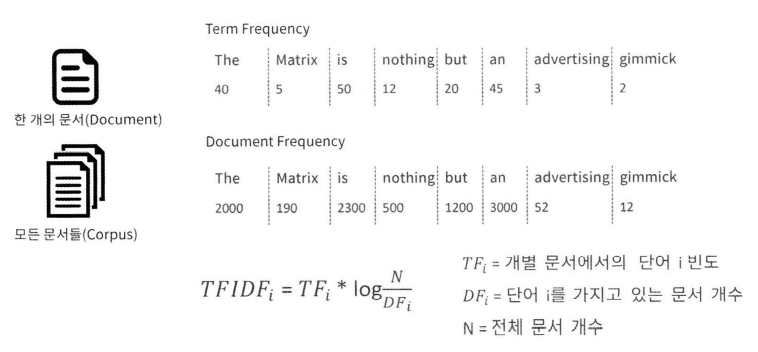

### 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer<br>
- 사이킷런의 `CountVectorizer` 클래스는 단지 피처 벡터화만 수행하지는 않으며 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함께 수행함
<br><br>

#### CountVectorizer 입력 파라미터
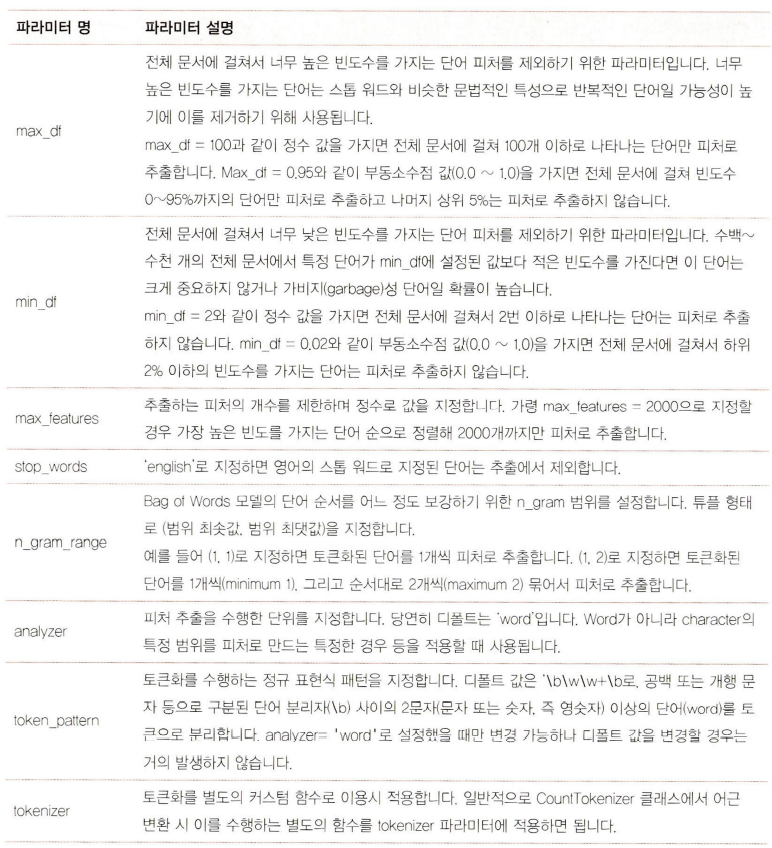
<br>
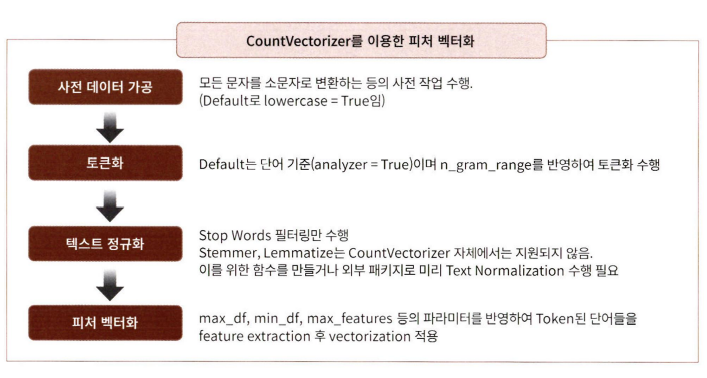
<br>
- TF-IDE 벡터화는 `TfidfVectorizer` 클래스를 이용하며 파라미터와 변환 방법은 위와 동일함

### BOW 벡터화를 위한 희소 행렬 <br>
- 사이킷런의 CountVectorizer/TfidfVectorizer를 이용해 텍스트를 피처 단위로 벡터화해 변환하고 CSR 형태의 희소 행렬을 반환함
- 모든 문서에 있는 단어를 추출해 이를 피처로 벡터화하는 방법은 필연적으로 많은 피처 칼럼을 만들 수밖에 없음
- 모든 문서에 있는 단어를 중복을 제거하고 피처로 만들면 일반적으로 수만 개에서 수십 만 개의 단어가 만들어짐
- 만일 n-gram을 (1,2)나 (1,3)으로 증가시키면 칼럼 수는 더욱 증가할 수밖에 없음
- 그러나 이러한 대규모의 행렬이 생성되더라도 레코드의 각 문서가 가지는 단어의 수는 제한적이기 때문에 이 행렬의 값은 대부분 0이 차지할 수밖에 없음
- BOW 형태를 가진 언어 모델의 피처 벡터화는 대부분 희소 행렬임
<br>

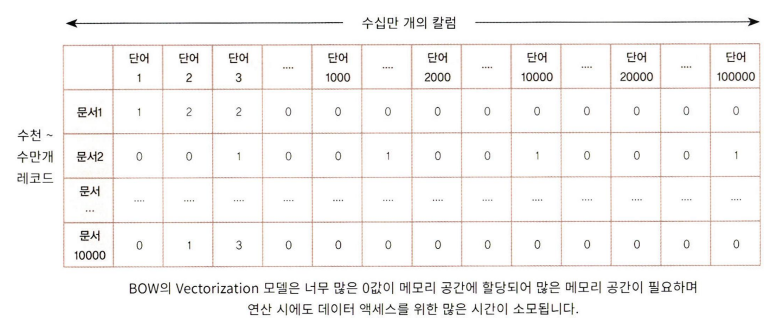
<br>
- 희소 행렬은 너무 많은 불필요한 0 값이 메모리 공간에 할당되어 메모리 공간이 많이 필요하며, 행렬의 크기가 커서 연산 시에도 데이터 액세스를 위한 시간이 많이 소모됨
- 따라서 이러한 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환해야 하는데, 대표적인 방법으로 COO 형식과 CSR 형식이 있음
<br><br>

### 희소 행렬 - COO 형식 <br>
- COO (Coordinate: 좌표) 형식은 0이 아닌 데이터만 별도의 데이터 배열로 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식임
- 파이썬에서는 희소 행렬 변환을 위해서 주로 사이파이(Scipy)를 사용함

In [13]:
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])

In [14]:
from scipy import sparse

#0이 아닌 데이터 추출
data = np.array([3,1,2])

#행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

#sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data,(row_pos,col_pos)))

In [15]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

### 희소 행렬 - CSR 형식 <br>
- CSR (Compressed Sparse Row) 형식은 COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용하는 문제점을 해결한 방식임
<br>

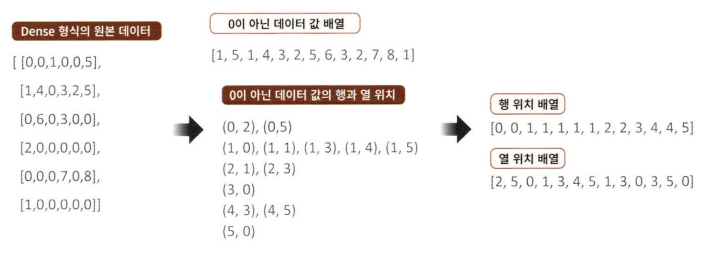
<br>
- 행 위치 배열을 보면 순차적인 같은 값이 반복적으로 나타남
- 행 위치 배열의 고유한 값의 시작 위치만 표기하는 방법으로 이러한 반복을 제거할 수 있음 (즉, 위치의 위치 표시)
- 행 위치 배열의 첫 번째(인덱스 0)는 0, 두 번째(인덱스 1)는 0, 세 번째(인덱스 2)는 1이라면 행 위치 배열의 고유 시작 위치는 첫 번째와 세 번째이고 인덱스 기준으로 [0,2]임
- 이처럼 CSR은 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식을 의미함)
- 이렇게 고유 값의 시작 위치만 알고 있으면 얼마든지 행 위치 배열을 다시 만들 수 있기에 COO 방식보다 메모리가 적게 들고 빠른 연산이 가능함
- CSR 방식의 변환은 사이파이의 csr_matrix 클래스를 이용해 쉽게 알 수 있음
<br>

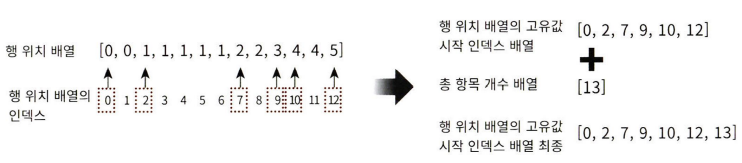

In [19]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

#0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

#행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

#COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

#행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

#CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('\nCSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]

CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [20]:
dense3 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)